# Understanding Distributions Through Sampling



**The point of this exercise is to understand how axes work, separating in different subplots those plots that at first were all in the same axis.**
* For that matter a few of the instructions given were:
* Create a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Create an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting that.


A second goal here is to deal with animations inside matplotlib library.

<IPython.core.display.Javascript object>


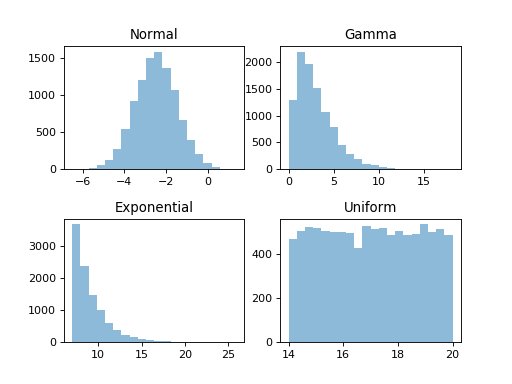

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

%matplotlib notebook


# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
X = [x1,x2,x3,x4]
i=0
Z = ['Normal','Gamma','Exponential','Uniform']
for x,z in zip(X,Z):
    i+=1
    plt.subplot(2, 2, i)
    plt.hist(x, bins=20, alpha=0.5)
    plt.title('{}'.format(Z[i-1]))
    plt.subplots_adjust(hspace=0.4)
    

<IPython.core.display.Javascript object>


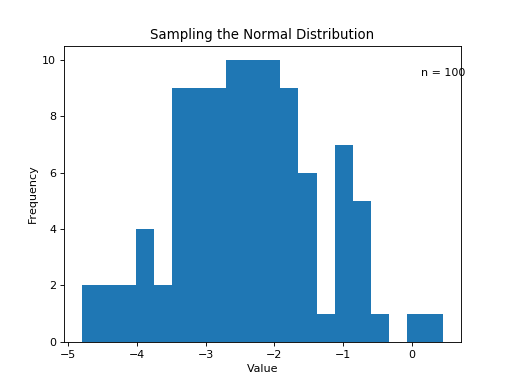

In [13]:
n=100
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n:
        a.event_source.stop()
    plt.cla()
    plt.hist(X[0][:curr], bins=20)
    #plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the {} Distribution'.format(Z[0]))
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), xy=(0.9,0.9),xycoords='axes fraction')

fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=10)

### Creating one function only for efficiency:

<IPython.core.display.Javascript object>


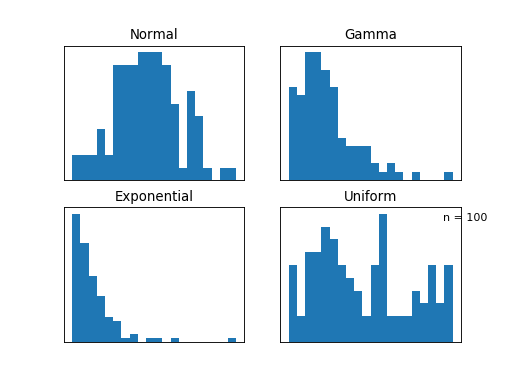

C:\Users\Bronze\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


In [14]:
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n:
        a.event_source.stop()
    ax1.cla()
    ax1.hist(X[0][:curr], bins=20)
    ax1.set_title('Normal')
    ax2.cla()
    ax2.hist(X[1][:curr], bins=20)
    ax2.set_title('Gamma')
    ax3.cla()
    ax3.hist(X[2][:curr], bins=20)
    ax3.set_title('Exponential')
    ax4.cla()
    ax4.hist(X[3][:curr], bins=20)
    ax4.set_title('Uniform')
    plt.annotate('n = {}'.format(curr), xy=(0.9,0.9),xycoords='axes fraction')
    
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex=False)
axs = [ax1,ax2,ax3,ax4]
for ax in axs:
    ax.tick_params(axis='x',which='both',bottom='off',labelbottom='off')
    ax.tick_params(axis='y',which='both',left='off',labelleft='off')
a = animation.FuncAnimation(fig, update, interval=100)